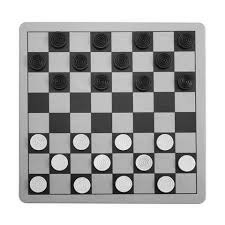

In [ ]:
#Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow
image=cv2.imread('/content/drive/My Drive/Image_inpainting/board.jpg')
img=cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(img)

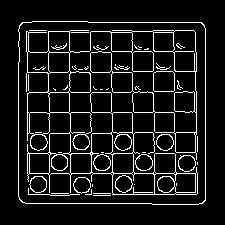

In [ ]:
edges = cv2.Canny(img,100,200)  #canny edge detection using opencv
cv2_imshow(edges)

In [ ]:
def hough_line(edges):
  theta= np.arange(0,180,1)  ## Theta 0 - 180 degree
  cos = np.cos(np.deg2rad(theta))
  sin = np.sin(np.deg2rad(theta))
 
  # Generate a accumulator matrix to store the values
  rho_range = int(np.hypot(edges.shape[0] , edges.shape[1])) #max value of rho size =2*diagonal_length
  accumulator = np.zeros((2 * rho_range, len(theta)), dtype=np.uint8)
 
  # Threshold to get edges pixel location (x,y)
  edge_pixels = np.where(edges == 255) #returns b bool matrix (True if edge_point=255; False is edge_point!=255)
  coordinates = list(zip(edge_pixels[0], edge_pixels[1]))  #to access the edge points
 
  # Calculate rho value for each edge location (x,y) with all the theta range
  for p in range(len(coordinates)):
    for t in range(len(theta)):
      rho = int(round(coordinates[p][1] * cos[t] + coordinates[p][0] * sin[t])) #compute rho=x*cost+y*sint
      accumulator[rho, t] += 1 #increment the accumulator cell
  return accumulator

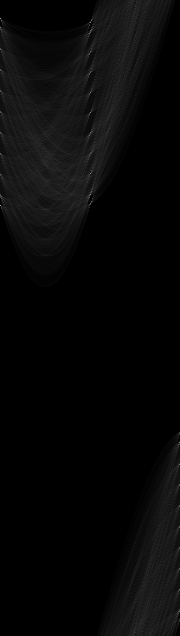

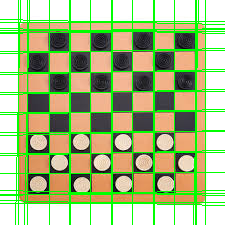

In [ ]:
 
 
accumulator=hough_line(edges)
cv2_imshow(accumulator)
# Function to do hough line transform\
 
#print(len(accumulator>=90)
# Threshold some high values then draw the line
edge_pixels = np.where(accumulator > 75)
 
coordinates = list(zip(edge_pixels[0], edge_pixels[1]))
 
# Use line equation to draw detected line on an original image
for i in range(0, len(coordinates)):
  a = np.cos(np.deg2rad(coordinates[i][1]))
  b = np.sin(np.deg2rad(coordinates[i][1]))
  x0 = a*coordinates[i][0]
  y0 = b*coordinates[i][0]
 
  x1 = int(x0 + 255*(-b))  #here 255(any constant) is multiplied to strech the lines over the edges 
  y1 = int(y0 + 255*(a))
  x2 = int(x0 - 255*(-b))
  y2 = int(y0 - 255*(a))
 
 
  cv2.line(image,(x1,y1),(x2,y2),(0,255,0),1)
 
cv2_imshow(image)